In [17]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

## DATA DESCRIPTION

In [20]:
file_path = 'https://raw.githubusercontent.com/datzxje/ML_Project/main/data/saved/merged_data.csv'
df = pd.read_csv(file_path)
df.head(2)

,Date,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2024-05-17,2381.4,2427.4,2377.8,2417.4,5.050,80.06,104.44,1.0870,505.33,16685.97,87.39,1090.0,2095.72,31.259,5303.27,11.99
1,2024-05-16,2391.5,2402.7,2375.2,2385.5,4.877,79.23,104.46,1.0865,497.51,16698.32,85.22,1071.3,2096.25,29.876,5297.10,12.42


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3720 non-null   object 
 1   gold_open   3720 non-null   float64
 2   gold_high   3720 non-null   float64
 3   gold_low    3720 non-null   float64
 4   gold_close  3720 non-null   float64
 5   copper      3720 non-null   float64
 6   crude_oil   3720 non-null   float64
 7   DXY         3720 non-null   float64
 8   EURUSD      3720 non-null   float64
 9   MSCI        3720 non-null   float64
 10  NASDAQ      3720 non-null   float64
 11  NLR         3720 non-null   float64
 12  platinum    3720 non-null   float64
 13  RUT         3720 non-null   float64
 14  silver      3720 non-null   float64
 15  SP500       3720 non-null   float64
 16  VIX         3720 non-null   float64
dtypes: float64(16), object(1)
memory usage: 494.2+ KB


In [22]:
print(df.dtypes)

non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
if len(non_numeric_columns) > 0:
     print("\nCac cot khong phai du lieu kieu so la:")
     print(non_numeric_columns)
else:
     print("\nTat ca cac cot deu la giu lieu kieu so")


Date           object
gold_open     float64
gold_high     float64
gold_low      float64
gold_close    float64
copper        float64
crude_oil     float64
DXY           float64
EURUSD        float64
MSCI          float64
NASDAQ        float64
NLR           float64
platinum      float64
RUT           float64
silver        float64
SP500         float64
VIX           float64
dtype: object

Cac cot khong phai du lieu kieu so la:
Index(['Date'], dtype='object')


In [23]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.dtypes

Date          datetime64[ns]
gold_open            float64
gold_high            float64
gold_low             float64
gold_close           float64
copper               float64
crude_oil            float64
DXY                  float64
EURUSD               float64
MSCI                 float64
NASDAQ               float64
NLR                  float64
platinum             float64
RUT                  float64
silver               float64
SP500                float64
VIX                  float64
dtype: object

In [24]:
##Checking Missing Values
df.isnull().sum()

Date          0
gold_open     0
gold_high     0
gold_low      0
gold_close    0
copper        0
crude_oil     0
DXY           0
EURUSD        0
MSCI          0
NASDAQ        0
NLR           0
platinum      0
RUT           0
silver        0
SP500         0
VIX           0
dtype: int64

In [25]:
##Setting Date as Index
df.set_index('Date',inplace=True)
df.head(3)

,gold_open,gold_high,gold_low,gold_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
Date,,,,,,,,,,,,,,,,
2024-05-17,2381.4,2427.4,2377.8,2417.4,5.0500,80.06,104.44,1.0870,505.33,16685.97,87.39,1090.0,2095.72,31.259,5303.27,11.99
2024-05-16,2391.5,2402.7,2375.2,2385.5,4.8770,79.23,104.46,1.0865,497.51,16698.32,85.22,1071.3,2096.25,29.876,5297.10,12.42
2024-05-15,2362.9,2396.1,2357.1,2394.9,4.9245,78.63,104.35,1.0882,490.06,16742.39,85.26,1070.1,2109.46,29.729,5308.15,12.45


In [26]:
num_rows, num_columns = df.shape
print("The number of rows after preprocessing:", num_rows)
print("The number of columns after preprocessing:", num_columns)

The number of rows after preprocessing: 3720
The number of columns after preprocessing: 16


## EXPLORATORY DATA ANALYSIS (EDA)

Du lieu lien tuc.


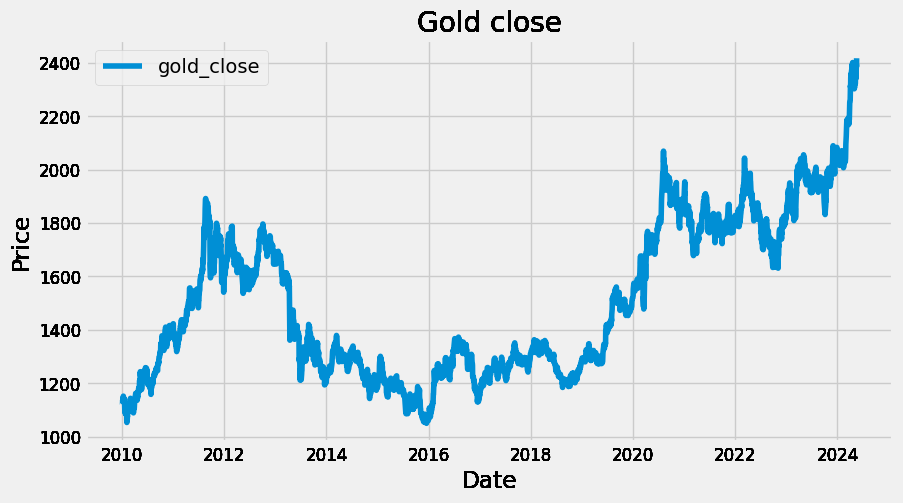

In [27]:

is_continuous = df['gold_close'].isnull().sum() == 0
if is_continuous:
    print("Du lieu lien tuc.")
else:
    print("Du lieu khong lien tuc.")


data = df
col_names = data.columns

fig = plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
for i in range(16):
  ax = fig.add_subplot(1, 1, 1) 
  ax.plot(df.index, df['gold_close'], label='gold_close')
  ax.set_title('Gold close')
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

C:\Users\name\AppData\Local\Temp\ipykernel_13928\2960195489.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\name\AppData\Local\Temp\ipykernel_13928\2960195489.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\name\AppData\Local\Temp\ipykernel_13928\2960195489.py:8: UserWarning:



`distplot` is a 

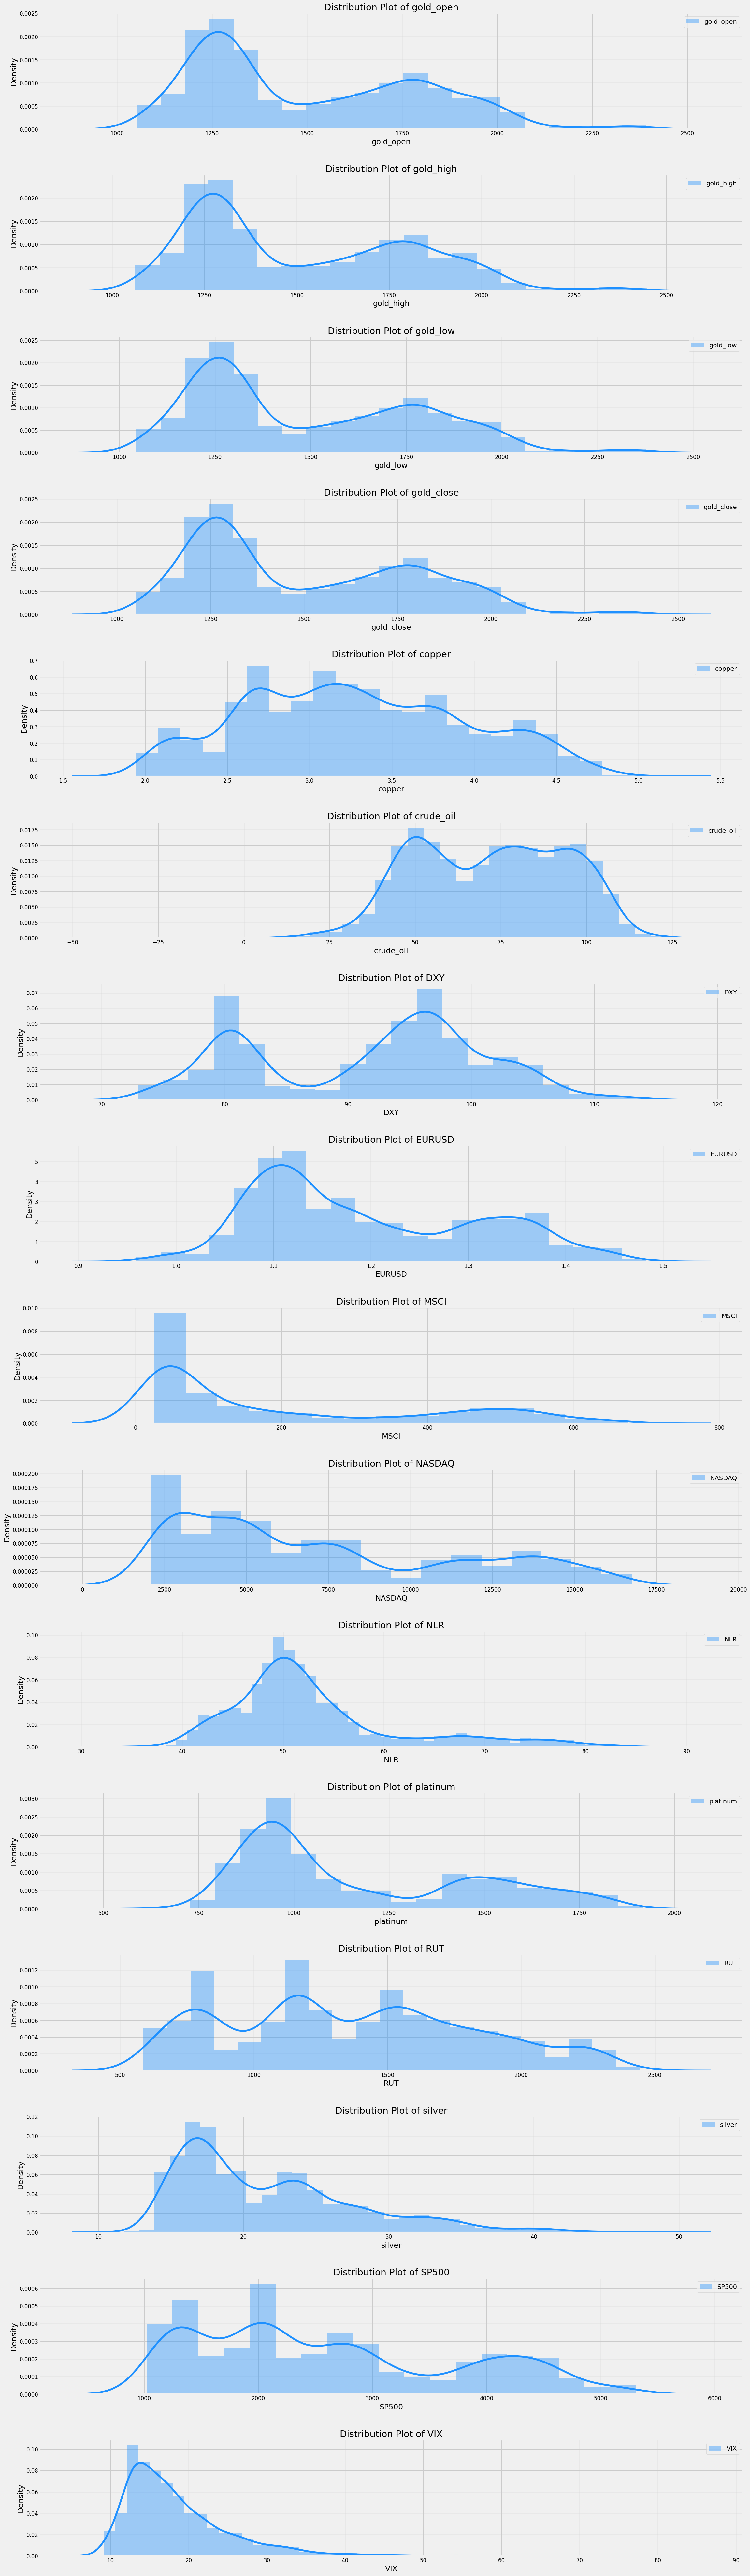

In [28]:
##Checking if Target and Features follow Normal Distribution
data = df
fig = plt.figure(figsize=(24, 80))
plt.style.use('fivethirtyeight')
col_names = data.columns
for i in range(16):
  ax = fig.add_subplot(16,1,i+1)
  sns.distplot(data.iloc[:,i],label=col_names[i],color='dodgerblue').set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
  ax.tick_params(labelsize=12)
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

Từ các biểu đồ phân phối ở trên :

-> Khoảng giá trị phổ biến nhất của giá vàng thường là từ 1000 đến 1500.

-> Các giá trị của giá vàng thường ít khi trên 2000.

-> Tất cả các đặc trưng đều không tuân theo đinh luật phân phối chuẩn.


## MULTIVARIATE ANALYSIS

In [29]:
import plotly.express as px


df_reset = df.reset_index(drop=True)

fig = px.parallel_coordinates(
    df_reset,
    color='gold_close',
    color_continuous_scale=px.colors.diverging.Tealrose,
    title='Parallel Co-ordinates Plot'
)

fig.show()

- Dựa theo Parallel Co-ordinates Plot (Biểu đồ tọa độ song song):
Vì những đặc điểm (feature) không tuân theo định luật phân phối chuẩn, chúng ta sẽ sử dụng Spearman (Hệ số tương quan Soearman).

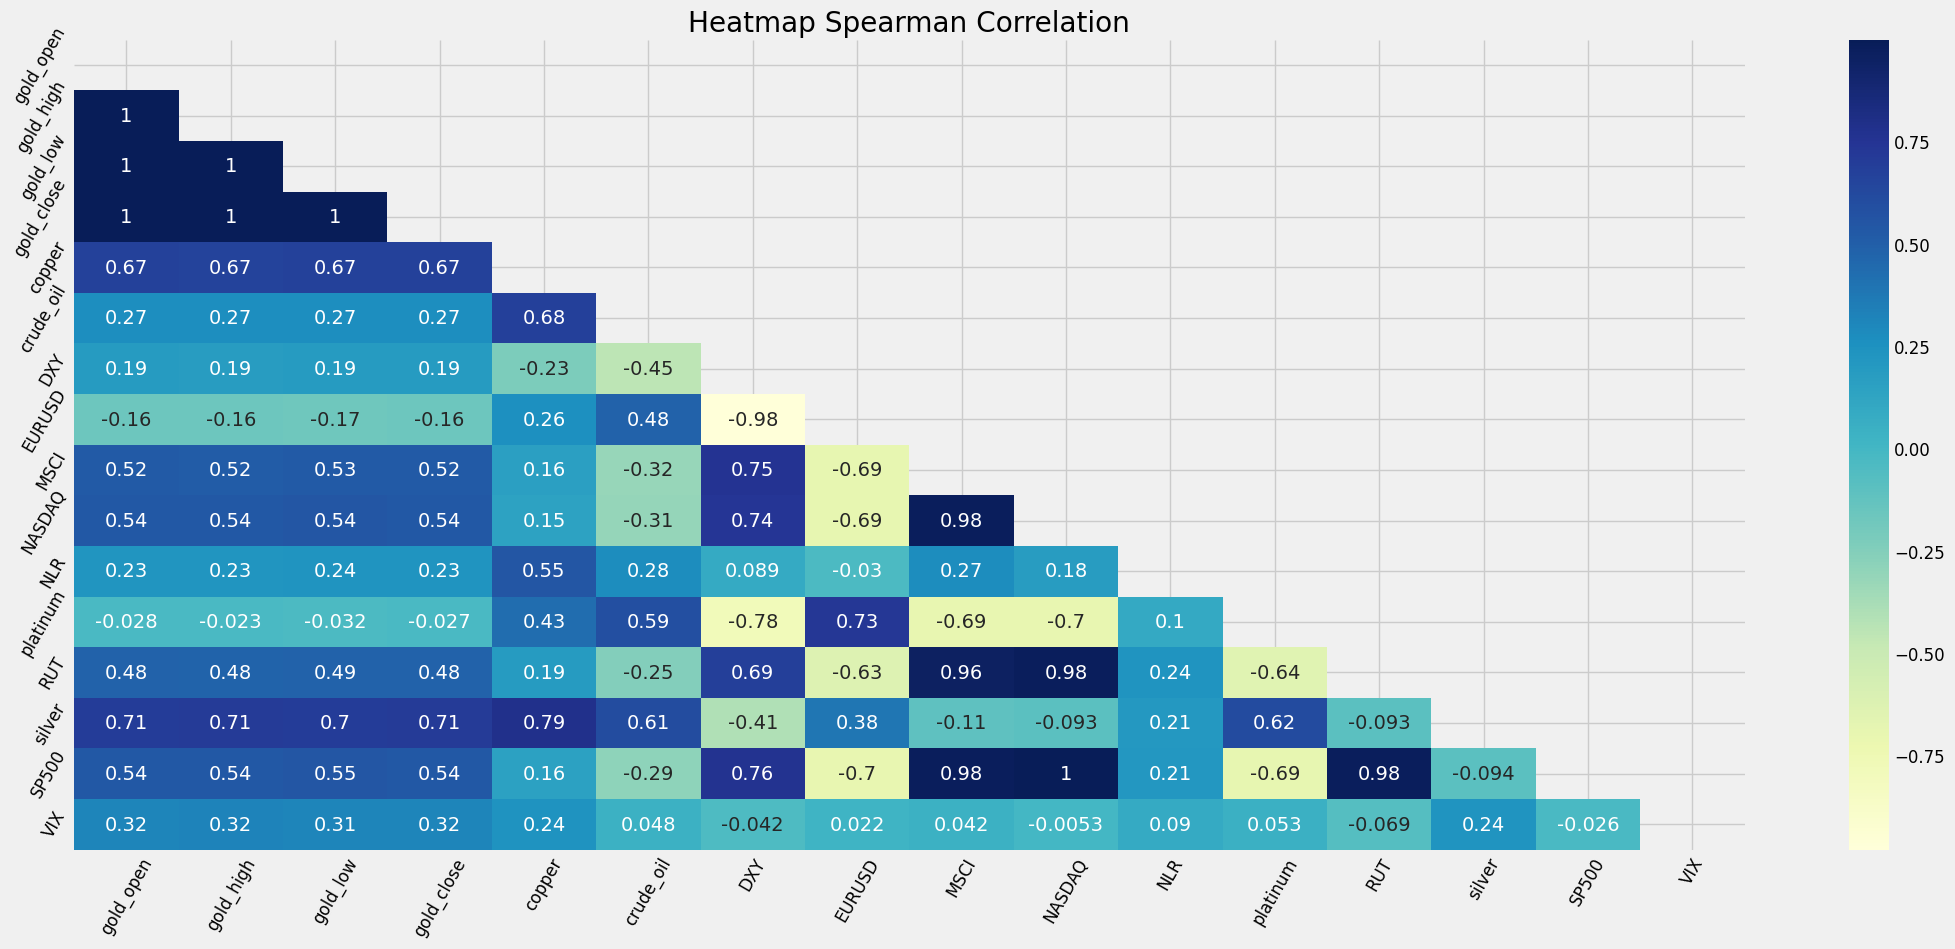

In [30]:
plt.figure(figsize=(24,10))
matrix = np.triu(df.corr(method='spearman'))
heat_map = sns.heatmap(df.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')
plt.style.use('fivethirtyeight')

- > Hệ số tương quan cao nhất với giá trị gold_close là silver (ρ: 0.71)
- > Gold_close có hệ số tương quan nghịch với EURUSD và platinum (ρ : -0.16 & ρ : -0.027)
- > Silver, copper đối với gold_close có hệ số tương quan khá là cao.(ρ : 0.6 - 0.8)









## FEATURE SELECTION


- >Bắt đầu loại bỏ những đặc trưng có hệ số tương quan Spearman nhỏ hơn giá trị tuyệt đối của 0.35.

In [32]:
##Feature Selection
after_fs = df[['gold_close','gold_high', 'gold_low', 'gold_open', 'copper', 'MSCI', 'NASDAQ', 'RUT', 'silver', 'SP500']]
after_fs.head(5)

,gold_close,gold_high,gold_low,gold_open,copper,MSCI,NASDAQ,RUT,silver,SP500
Date,,,,,,,,,,
2024-05-17,2417.4,2427.4,2377.8,2381.4,5.0500,505.33,16685.97,2095.72,31.259,5303.27
2024-05-16,2385.5,2402.7,2375.2,2391.5,4.8770,497.51,16698.32,2096.25,29.876,5297.10
2024-05-15,2394.9,2396.1,2357.1,2362.9,4.9245,490.06,16742.39,2109.46,29.729,5308.15
2024-05-14,2359.9,2365.2,2340.5,2342.3,4.8950,488.11,16511.18,2085.69,28.702,5246.68
2024-05-13,2343.0,2370.8,2337.6,2369.1,4.7660,485.51,16388.24,2062.12,28.443,5221.42


In [36]:
after_fs.to_csv('P_data.csv', index=True)